<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Python201_Modeling/blob/master/Credit_Risk_In_Banking_Fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan Google Colaboratory dan Data Preparation

Karena data tersedia di website tjahaja, maka kita dapat langsung run dari Google Colab

## Python Dataframe - Cara Python membaca dataset / tabel

In [1]:
## III.2.1 Persiapan data dan impor ke Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel("https://tjahaja.com/wp-content/uploads/2021/10/Credit_Scoring_Dataset.xlsx")
print("read datafile")

# Alternative 
# Untuk grup 1: https://tjahaja.com/wp-content/uploads/2021/10/german_credit_easy.xlsx
# Untuk grup 2: https://tjahaja.com/wp-content/uploads/2021/10/OnClass_CreditScoring_data_v2.xlsx
# Untuk grup 3: https://tjahaja.com/wp-content/uploads/2021/10/simulation_credit_kaggle_laotse.xlsx
# Untuk yang mencari tantangan: https://tjahaja.com/wp-content/uploads/2021/10/Fraud_Scoring_Dataset.xlsx

read datafile


Cara Python menggunakan library adalah dengan perintah impor. Ketika memanggil library tersebut untuk digunakan pun, pembaca harus tetap menulis library tersebut. Seperti contoh di atas, ketika kita ingin menggunakan library pandas untuk impor data, pembaca harus menulis library (pandas), lalu nama fungsi yang ingin digunakan (read_excel). Data set tersebut disimpan dalam variabel data frame dengan nama df.

## Melihat isi dari dataset

In [2]:
# Membaca file dan menera[kan tipe variabel
# Koding ini harus diganti, menyesuaikan dengan tipe data yang digunakan
df.head()

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,SLIK_Kolektibilitas,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,1,elektronik,500000,1_pegawai_tetap,5. >20 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,Kolek 1,859684.752267,0.000000e+00,305,192,Android,6,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0002,1_Gagal,1,peralatan_rumahtangga,2000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_2,22.0,2_1-5_tahun,Kolek 3,743722.804144,1.301412e+06,252,86,IOS,9,3_Lebih_3_tahun,Games,Telco_A,1_Kurang_1_bulan,Public_Domain
2,ABC0005,1_Gagal,4,pendidikan,1000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_3,Daerah_3,53.0,4_>10_tahun,Kolek 2,102046.058576,7.548064e+05,487,63,Android,10,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
3,ABC0010,1_Gagal,3,liburan,500000,4_tidak_bekerja,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,Kolek 1,226586.344920,0.000000e+00,254,285,Android,17,2_1_ke_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain
4,ABC0012,1_Gagal,6,buka_bisnis,1000000,1_pegawai_tetap,1. < 1 juta,2_<1_tahun_kerja,1_belum_menikah,2_sewa,Daerah_1,Daerah_3,24.0,4_>10_tahun,Kolek 3,307526.239529,7.054425e+04,462,137,Android,4,2_1_ke_3_tahun,Games,Telco_A,5_Lebih_5_tahun,Public_Domain


## Melihat Struktur data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1000 non-null   object 
 1   gagal_bayar                     1000 non-null   object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 1000 non-null   object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       988 non-null    object 
 6   Pendapatan_perbulan             990 non-null    object 
 7   Lama_Bekerja                    973 non-null    object 
 8   Status                          996 non-null    object 
 9   Kepemilikan_Rumah               997 non-null    object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            999

Struktur data adalah cara untuk mengatur penyimpanan data. Python dapat membuat berbagai tipe dataset, seperti vektor, matrix, array, dan list. Tetapi dalam buku ini, penulis akan fokus kepada satu tipe dataset yang selalu digunakan di analisa data: data frame.

Data Frame adalah data set yang terdiri dari baris dan kolom. Sesuai dengan contoh data yang diimpor dalam contoh koding adalah data pemberian kredit dari sebuah pinjol. Dalam hal ini, baris dari data frame menunjukan jumlah observasi dari user pinjol, ada 1000 baris observasi. Kolom menunjukan variabel informasi mengenai nasabah bank tersebut, ada 25 kolom variabel informasi dalam contoh ini.

Seperti yang terlihat dari contoh diatas, setiap kolom memiliki tipe data yang berbeda. Misalnya, satu kolom dapat berupa angka, kolom lain dapat berupa tulisan. Secara garis besar, ada tiga tipe data yang tersedia di bahasa programming:

Karakter (character/object), atau sering disebut object, string, atau teks. Ini adalah tipe data yang berisikan huruf atau kata-kata.
Numerik (number/float/double/integer), berisikan angka. Jika angkanya hanya boleh berisikan angka bulat, disebut integer. Jika boleh memiliki koma, disebut double, float, atau real.
Logis (boolean), hanya berisikan TRUE atau FALSE, atau benar atau salah.

# Data Eksplorasi (Explanatory Data Analysis atau EDA)


## Target Variabel - gagal_bayar / default

In [4]:
## III.2.4 Eksplorasi data untuk memeriksa hasil hipotesis

# Untuk melihat frekuensi dari variabel default
print(df['gagal_bayar'].value_counts())

0_Bayar    705
1_Gagal    295
Name: gagal_bayar, dtype: int64


In [5]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df['gagal_bayar'] == '1_Gagal', 
             df['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df['default'] = np.select(conditions,choices, default = 0)

In [6]:
# Untuk melihat frekuensi dari variabel default
print(df['default'].value_counts())

0    705
1    295
Name: default, dtype: int64


## EDA - Variabel Kategori - SLIK_Kolektibilitas

In [7]:
# Untuk melihat frekuensi dari variabel credit_history
print(df['SLIK_Kolektibilitas'].value_counts())

Kolek 3            510
Kolek 1            286
Kolek 2             88
Tidak_Ditemukan     53
Kolek 5             49
Kolek 4             14
Name: SLIK_Kolektibilitas, dtype: int64


In [8]:
# Untuk melihat proporsi dari variabel credit_history
print(df['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

Kolek 3            51.0
Kolek 1            28.6
Kolek 2             8.8
Tidak_Ditemukan     5.3
Kolek 5             4.9
Kolek 4             1.4
Name: SLIK_Kolektibilitas, dtype: float64


In [9]:
# Untuk melihat proporsi dari variabel credit_history
# atau
print(df['SLIK_Kolektibilitas'].value_counts() / len(df['SLIK_Kolektibilitas']) * 100)

Kolek 3            51.0
Kolek 1            28.6
Kolek 2             8.8
Tidak_Ditemukan     5.3
Kolek 5             4.9
Kolek 4             1.4
Name: SLIK_Kolektibilitas, dtype: float64


In [10]:
# Melihat kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df['SLIK_Kolektibilitas'], df['gagal_bayar']))

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
Kolek 1                  240       46
Kolek 2                   61       27
Kolek 3                  352      158
Kolek 4                    6        8
Kolek 5                   21       28
Tidak_Ditemukan           25       28


In [11]:
# Melihat proporsi kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df['SLIK_Kolektibilitas'], df['gagal_bayar'], normalize='index') * 100)

gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
Kolek 1              83.916084  16.083916
Kolek 2              69.318182  30.681818
Kolek 3              69.019608  30.980392
Kolek 4              42.857143  57.142857
Kolek 5              42.857143  57.142857
Tidak_Ditemukan      47.169811  52.830189


## EDA - Variabel Numerik - Usia

In [12]:
# Rangkuman statistik untuk variabel numerik
print(df['Usia'].describe())

count    999.000000
mean      35.550551
std       11.380256
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


In [13]:
# Rangkuman statistik untuk variabel numerik Age, berdasarkan default (gagal bayar atau tidak)
df.groupby('default')['Usia'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,704.0,36.210227,11.350418,19.0,27.0,34.0,42.0,75.0
1,295.0,33.976271,11.315638,19.0,25.0,30.0,40.0,74.0


In [14]:
# Menghitung korelasi antara variabel Age dengan default
print(df['default'].corr(df['Usia']))

-0.0895925583035647


In [15]:
# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel Age dengan default (gagal bayar dan tidak gagal bayar)
from scipy import stats
stats.ttest_ind( df[df.default == 0].Usia,
                 df[df.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.8403349215332883, pvalue=0.004598315634865308)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

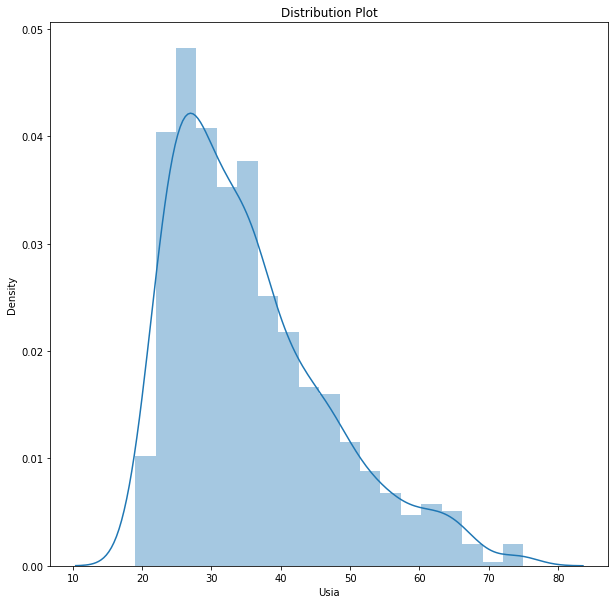

In [16]:
## III.2.5.2 Distribusi data untuk variabel tipe numerik

# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi 

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['Usia'].dropna(), ax=ax).set_title('Distribution Plot') 

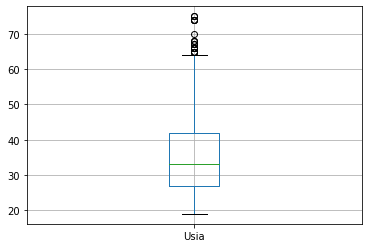

In [17]:
df.boxplot(column=['Usia'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


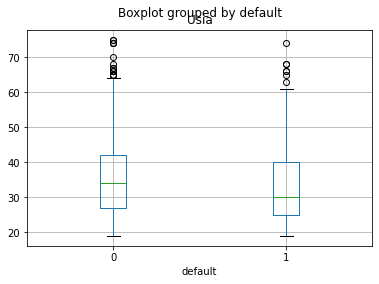

In [18]:
# Menambahkan by di fungsi boxplot
df.boxplot(by='default',column=['Usia'])

## Korelasi antar variabel numerik

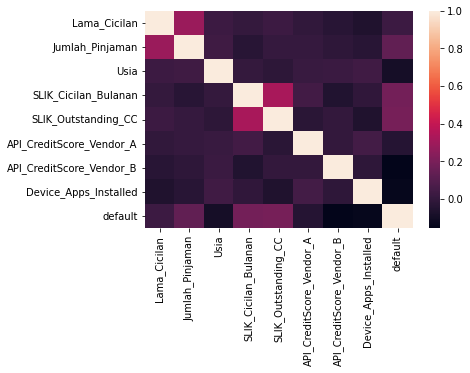

In [19]:
## III.2.6 Korelasi Antar Variabel

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Data Preparation - Menghadapi missing data

In [20]:
## III.3.1 Penanganan untuk data yang hilang (missing values)

# Membuat kopi dari df dan menyimpan sebagai df_prepare
df_prepare = df.copy()

In [21]:
# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus)

for column in df_prepare.columns:
        df_prepare[column].fillna(df_prepare[column].mode()[0], inplace=True)

In [22]:
df_prepare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1000 non-null   object 
 1   gagal_bayar                     1000 non-null   object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 1000 non-null   object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       1000 non-null   object 
 6   Pendapatan_perbulan             1000 non-null   object 
 7   Lama_Bekerja                    1000 non-null   object 
 8   Status                          1000 non-null   object 
 9   Kepemilikan_Rumah               1000 non-null   object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            100

## Data Engineering

In [23]:
## III.3.3 Pembuatan variabel yang baru (Feature Engineering) 

conditions = [
             ( df_prepare['Pendapatan_perbulan'] == '1. < 1 juta' ),
             ( df_prepare['Pendapatan_perbulan'] == '2. 1 - 5 juta' ),
             ( df_prepare['Pendapatan_perbulan'] == '3. 5 - 10 juta' ),
             ( df_prepare['Pendapatan_perbulan'] == '4. 10 - 20 juta' ),
             ( df_prepare['Pendapatan_perbulan'] == '5. >20 juta' )
             ]

choices = [
          ( (df_prepare['SLIK_Cicilan_Bulanan'] + (df_prepare['SLIK_Outstanding_CC'] * 0.1) ) / 1000000 ),
          ( (df_prepare['SLIK_Cicilan_Bulanan'] + (df_prepare['SLIK_Outstanding_CC'] * 0.1) ) / 5000000 ),
          ( (df_prepare['SLIK_Cicilan_Bulanan'] + (df_prepare['SLIK_Outstanding_CC'] * 0.1) ) / 10000000 ),
          ( (df_prepare['SLIK_Cicilan_Bulanan'] + (df_prepare['SLIK_Outstanding_CC'] * 0.1) ) / 20000000 ),
          ( (df_prepare['SLIK_Cicilan_Bulanan'] + (df_prepare['SLIK_Outstanding_CC'] * 0.1) ) / 30000000 )
          ]
df_prepare['DBR'] = np.select(conditions, choices)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


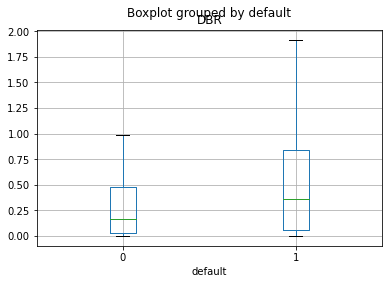

In [24]:
# Fungsi boxplot dari variabel cicilan_per_bulan, dengan kemungkinan gagal bayar
df_prepare.boxplot(by='default',column=['DBR'])

In [25]:
# Menghitung korelasi dan uji coba hipotesis antara variabel cicilan_per_bulan dengan default

print(df_prepare['default'].corr(df_prepare['DBR']))

stats.ttest_ind( df_prepare[df_prepare.default == 0].DBR,
                 df_prepare[df_prepare.default == 1].DBR, nan_policy='omit')

0.2911267703324291


Ttest_indResult(statistic=-9.613436950082129, pvalue=5.50563534580932e-21)

In [26]:
## III.3.4 Transformasi variabel kategori menjadi numerik (One-Hot Encoding) 

# Koding untuk one hot encoding untuk semua variabel kategori

# Langkah pertama adalah membuang variabel ID karena ini adalah identifikasi nasabah
df_prepare.drop(['ID'], axis = 1, inplace = True)
df_prepare.drop(['gagal_bayar'], axis = 1, inplace = True)

# Memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df_prepare.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df_prepare.select_dtypes(include=['float64','int64','int'])

# Memisahkan target/dependent variabel dari dataset dengan variabel kategori
target = df_prepare['default']
dataset_int.drop(['default'], axis = 1, inplace = True)

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
dataset = pd.concat([dataset_dummies_df, dataset_int], axis = 1)
feature_name = dataset.columns
df_encoded = pd.concat([dataset, target], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Tujuan_Pinjaman_elektronik                   1000 non-null   uint8  
 1   Tujuan_Pinjaman_liburan                      1000 non-null   uint8  
 2   Tujuan_Pinjaman_makanan                      1000 non-null   uint8  
 3   Tujuan_Pinjaman_pendidikan                   1000 non-null   uint8  
 4   Tujuan_Pinjaman_peralatan_rumahtangga        1000 non-null   uint8  
 5   Pekerjaan_2_pegawai_kontrak                  1000 non-null   uint8  
 6   Pekerjaan_3_wiraswasta                       1000 non-null   uint8  
 7   Pekerjaan_4_tidak_bekerja                    1000 non-null   uint8  
 8   Pendapatan_perbulan_2. 1 - 5 juta            1000 non-null   uint8  
 9   Pendapatan_perbulan_3. 5 - 10 juta           1000 non-null   uint8  
 10  P

,Tujuan_Pinjaman_elektronik,Tujuan_Pinjaman_liburan,Tujuan_Pinjaman_makanan,Tujuan_Pinjaman_pendidikan,Tujuan_Pinjaman_peralatan_rumahtangga,Pekerjaan_2_pegawai_kontrak,Pekerjaan_3_wiraswasta,Pekerjaan_4_tidak_bekerja,Pendapatan_perbulan_2. 1 - 5 juta,Pendapatan_perbulan_3. 5 - 10 juta,Pendapatan_perbulan_4. 10 - 20 juta,Pendapatan_perbulan_5. >20 juta,Lama_Bekerja_2_<1_tahun_kerja,Lama_Bekerja_3_1-4_tahun_kerja,Lama_Bekerja_4_4-7_tahun_kerja,Lama_Bekerja_5_>7_tahun_kerja,Status_2_menikah,Status_3_bercerai,Kepemilikan_Rumah_2_sewa,Kepemilikan_Rumah_3_bersama_keluarga,Alamat_Rumah_Daerah_2,Alamat_Rumah_Daerah_3,Alamat_Rumah_Daerah_4,Alamat_Kantor_Daerah_2,Alamat_Kantor_Daerah_3,Alamat_Kantor_Daerah_4,Lama_tinggal_ditempat_sekarang_2_1-5_tahun,Lama_tinggal_ditempat_sekarang_3_5-10_tahun,Lama_tinggal_ditempat_sekarang_4_>10_tahun,SLIK_Kolektibilitas_Kolek 2,SLIK_Kolektibilitas_Kolek 3,SLIK_Kolektibilitas_Kolek 4,SLIK_Kolektibilitas_Kolek 5,SLIK_Kolektibilitas_Tidak_Ditemukan,Device_Type_IOS,Device_Active_Since_2_1_ke_3_tahun,Device_Active_Since_3_Lebih_3_tahun,Device_Apps_Segmentation_Online_Lending,Device_Apps_Segmentation_Productivity,Device_Apps_Segmentation_Shopping,Device_Apps_Segmentation_Social_Media,Mobile_Provider_Telco_B,Mobile_Provider_Telco_C,Mobile_Provider_Telco_D,Mobile_Provider_Telco_E,Mobile_Number_Active_Since_2_Kurang_1_tahun,Mobile_Number_Active_Since_3_1_ke_2_tahun,Mobile_Number_Active_Since_4_2_ke_5_tahun,Mobile_Number_Active_Since_5_Lebih_5_tahun,Email_Domain_Type_Public_Domain,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,DBR,default
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,500000,67.0,859684.752267,0.000000e+00,305,192,6,0.028656,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2000000,22.0,743722.804144,1.301412e+06,252,86,9,0.873864,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,4,1000000,53.0,102046.058576,7.548064e+05,487,63,10,0.177527,1
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,3,500000,28.0,226586.344920,0.000000e+00,254,285,17,0.226586,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,1000000,24.0,307526.239529,7.054425e+04,462,137,4,0.314581,1


## Data Preparation - Training dan Test data

In [28]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'default']
X = df_encoded.loc[:,df_encoded.columns != 'default']

nama_kolom = X.columns

# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling

## Decision Tree Model

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


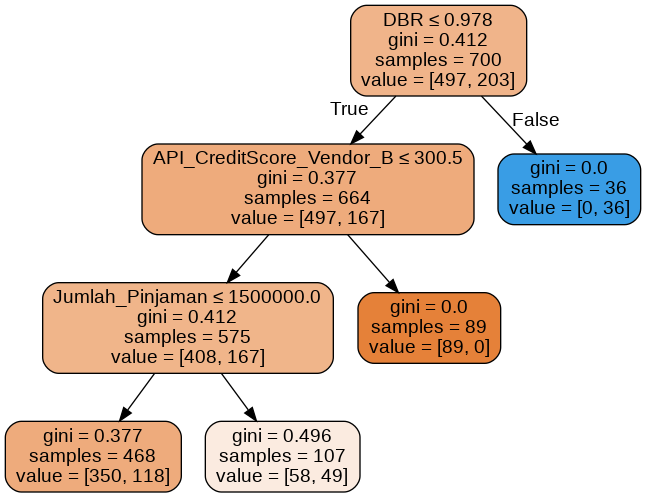

In [29]:
# Menggunakan fungsi DecisionTree dari library sklearn
from sklearn.tree import DecisionTreeClassifier

# Fungsi Decision Tree, menggunakan opsi dasar saja
model = DecisionTreeClassifier(max_depth = 3)

# Melakukan model Decision Tree kepada data training
model.fit(X_train, y_train)

# Visualisasi dari Decision Tree
import pydotplus
import graphviz

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, Image
from sklearn.externals.six import StringIO

# Untuk dapat menggunakan graphviz memerlukan instalasi library yang tepat, silahkan refer ke website berikut untuk petunjuk instalasi:
# https://stackoverflow.com/questions/27666846/pydot-invocationexception-graphvizs-executables-not-found

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = nama_kolom)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Model Evaluation

In [30]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       208
           1       0.91      0.23      0.37        92

    accuracy                           0.76       300
   macro avg       0.83      0.61      0.61       300
weighted avg       0.80      0.76      0.70       300

Confusion matrix:
 [[206   2]
 [ 71  21]]
ROC Score: 0.6966973244147157


# Metode dengan Logistic Regression

In [31]:
# Model Logistic Regression

from sklearn.linear_model import LogisticRegression

# Pembuatan model logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Metode dengan Logistic Regression dengan Stats

In [32]:
import numpy as np
import statsmodels.api as sm

model_stats = sm.Logit(y_train, X_train)
result = model_stats.fit(method='newton')

result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.405645
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      641
Method:                           MLE   Df Model:                           58
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.3263
Time:                        04:09:22   Log-Likelihood:                -283.95
converged:                       True   LL-Null:                       -421.51
Covariance Type:            nonrobust   LLR p-value:                 5.646e-30
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Tujuan_Pinjaman_elektronik                      0.4349      0.320      1.360      0.174      -0.192       1.061
Tujuan_Pinjaman_liburan                        -0.0640      0.467     -0.137      0.891      -0.980       0.852
Tujuan_Pinjaman_makanan                         0.9636      0.405      2.377      0.017       0.169       1.758
Tujuan_Pinjaman_pendidikan                      0.2882      0.510      0.565      0.572      -0.711       1.287
Tujuan_Pinjaman_peralatan_rumahtangga           0.6877      0.445      1.547      0.122      -0.184       1.559
Pekerjaan_2_pegawai_kontrak                    -0.3222      0.737     -0.437      0.662      -1.767       1.123
Pekerjaan_3_wiraswasta                          0.2040      0.295      0.691      0.490      -0.375       0.783
Pekerjaan_4_tidak_bekerja                      -0.1436      0.356     -0.403      0.687      -0.842       0.555
Pendapatan_perbulan_2. 1 - 5 juta              -0.3116      0.448     -0.696      0.486      -1.189       0.566
Pendapatan_perbulan_3. 5 - 10 juta             -0.9067      0.595     -1.524      0.128      -2.073       0.259
Pendapatan_perbulan_4. 10 - 20 juta            -0.6405      0.706     -0.907      0.364      -2.025       0.744
Pendapatan_perbulan_5. >20 juta                -0.8503      0.458     -1.858      0.063      -1.747       0.047
Lama_Bekerja_2_<1_tahun_kerja                   0.0265      0.515      0.051      0.959      -0.983       1.036
Lama_Bekerja_3_1-4_tahun_kerja                 -0.4810      0.499     -0.964      0.335      -1.459       0.497
Lama_Bekerja_4_4-7_tahun_kerja                 -0.8487      0.534     -1.588      0.112      -1.896       0.199
Lama_Bekerja_5_>7_tahun_kerja                  -0.4377      0.525     -0.834      0.404      -1.467       0.591
Status_2_menikah                               -0.2008      0.275     -0.730      0.465      -0.740       0.338
Status_3_bercerai                               0.5346      0.367      1.457      0.145      -0.185       1.254
Kepemilikan_Rumah_2_sewa                        0.6918      0.308      2.246      0.025       0.088       1.295
Kepemilikan_Rumah_3_bersama_keluarga            0.1410      0.383      0.368      0.713      -0.609       0.891
Alamat_Rumah_Daerah_2                           0.0922      0.281      0.328      0.743      -0.459       0.643
Alamat_Rumah_Daerah_3                           0.1198      0.318      0.377      0.706      -0.503       0.743
Alamat_Rumah_Daerah_4                          -0.2407      0.331     -0.728      0.467      -0.889       0.408
Alamat_Kantor_Daerah_2                          0.2765      0.308      0.899      0.369      -0.327       0.880
Alamat_Kantor_Daerah_3                          0.3977      0.333      1.196      0.232      -0.254       1.050
Alamat_Kantor_Daerah_4                          0.4769      0.357      1.335      0.182      -0.223      

In [33]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.81       208
           1       0.56      0.21      0.30        92

    accuracy                           0.71       300
   macro avg       0.64      0.57      0.56       300
weighted avg       0.67      0.71      0.66       300

Confusion matrix:
 [[193  15]
 [ 73  19]]
ROC Score: 0.590928093645485


# Metode dengan Library Scorecardpy

In [34]:
# install scorecardpy

!pip install -q scorecardpy

     |████████████████████████████████| 55 kB 2.6 MB/s 


In [46]:
# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# scorecardpy library sudah memiliki fungsi untuk data split, scale, dan lainnya, oleh karena itu kita akan load df_prepare saja
dat = df_prepare

In [47]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Lama_Cicilan                    1000 non-null   int64  
 1   Tujuan_Pinjaman                 1000 non-null   object 
 2   Jumlah_Pinjaman                 1000 non-null   int64  
 3   Pekerjaan                       1000 non-null   object 
 4   Pendapatan_perbulan             1000 non-null   object 
 5   Lama_Bekerja                    1000 non-null   object 
 6   Status                          1000 non-null   object 
 7   Kepemilikan_Rumah               1000 non-null   object 
 8   Alamat_Rumah                    1000 non-null   object 
 9   Alamat_Kantor                   1000 non-null   object 
 10  Usia                            1000 non-null   float64
 11  Lama_tinggal_ditempat_sekarang  1000 non-null   object 
 12  SLIK_Kolektibilitas             100

In [48]:
# Filter variabel secara otomatis
# Filter otomatis variabel dari fungsi scorecard, dengan tidak mengikutsertakan variabel yang terlalu banyak missing value dan nilai minimum Information Value
dt_s = scpy.var_filter(dat, y = 'default')

[INFO] filtering variables ...


In [49]:
dt_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SLIK_Outstanding_CC         1000 non-null   float64
 1   Mobile_Provider             1000 non-null   object 
 2   Pendapatan_perbulan         1000 non-null   object 
 3   Lama_Bekerja                1000 non-null   object 
 4   Lama_Cicilan                1000 non-null   int64  
 5   Kepemilikan_Rumah           1000 non-null   object 
 6   Usia                        1000 non-null   float64
 7   Device_Apps_Segmentation    1000 non-null   object 
 8   Device_Apps_Installed       1000 non-null   int64  
 9   Device_Type                 1000 non-null   object 
 10  Tujuan_Pinjaman             1000 non-null   object 
 11  API_CreditScore_Vendor_A    1000 non-null   int64  
 12  Mobile_Number_Active_Since  1000 non-null   object 
 13  API_CreditScore_Vendor_B    1000 n

In [50]:
# breaking dt_s menjadi training dan test dataset
train, test = scpy.split_df(dt_s, y='default').values()

# Melakukan WOE binning
bins = scpy.woebin(train, y = 'default')

[INFO] creating woe binning ...


{'API_CreditScore_Vendor_A': <Figure size 432x288 with 2 Axes>,
 'API_CreditScore_Vendor_B': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Installed': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Segmentation': <Figure size 432x288 with 2 Axes>,
 'Device_Type': <Figure size 432x288 with 2 Axes>,
 'Jumlah_Pinjaman': <Figure size 432x288 with 2 Axes>,
 'Kepemilikan_Rumah': <Figure size 432x288 with 2 Axes>,
 'Lama_Bekerja': <Figure size 432x288 with 2 Axes>,
 'Lama_Cicilan': <Figure size 432x288 with 2 Axes>,
 'Mobile_Number_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Mobile_Provider': <Figure size 432x288 with 2 Axes>,
 'Pendapatan_perbulan': <Figure size 432x288 with 2 Axes>,
 'SLIK_Kolektibilitas': <Figure size 432x288 with 2 Axes>,
 'SLIK_Outstanding_CC': <Figure size 432x288 with 2 Axes>,
 'Status': <Figure size 432x288 with 2 Axes>,
 'Tujuan_Pinjaman': <Figure size 432x288 with 2 Axes>,
 'Usia': <Figure size 432x288 with 2 Axes>}

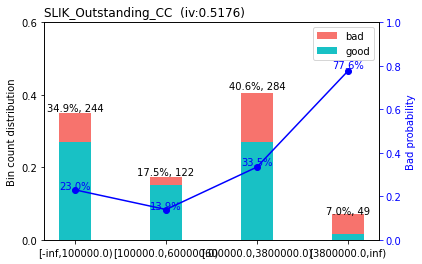

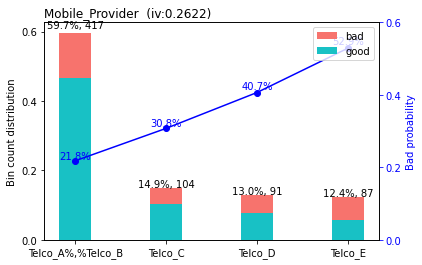

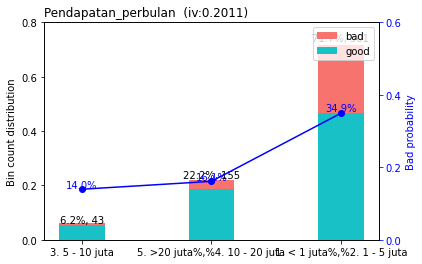

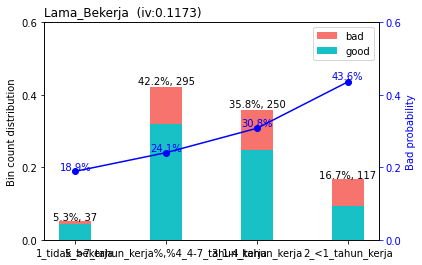

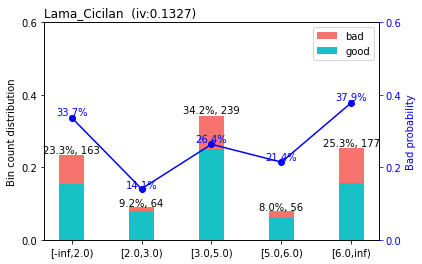

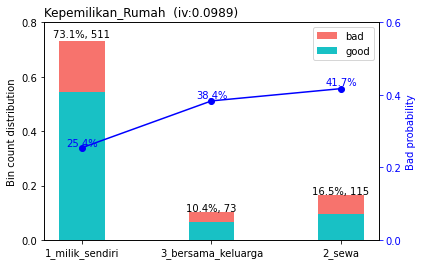

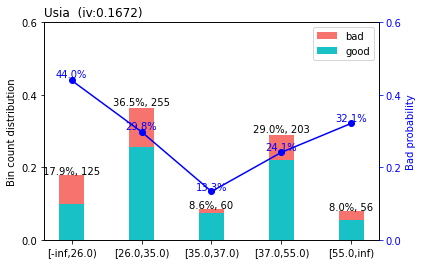

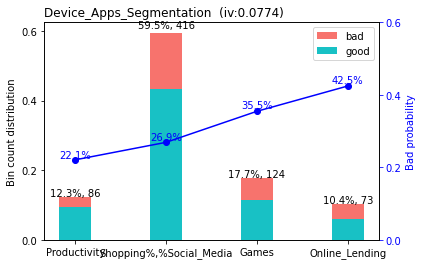

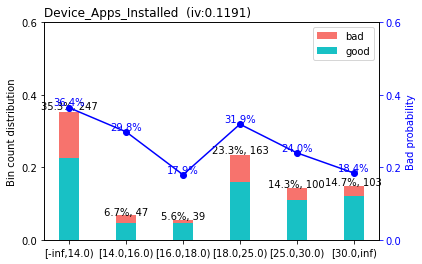

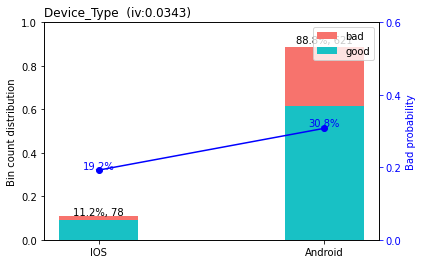

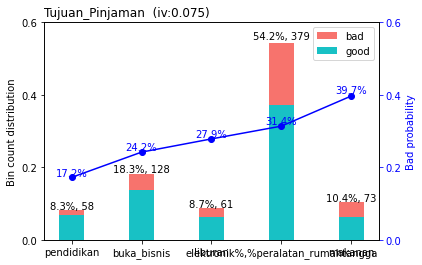

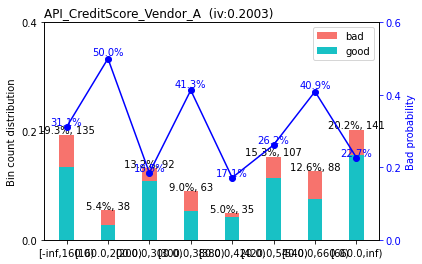

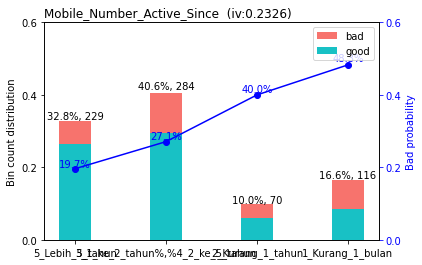

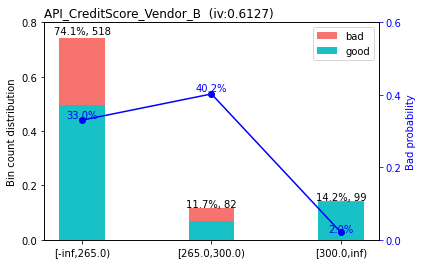

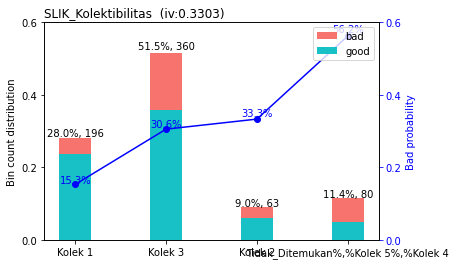

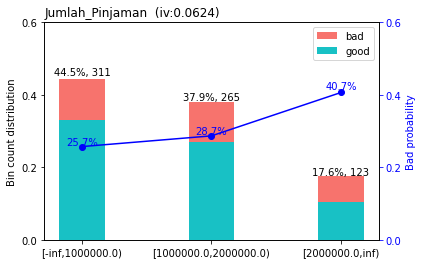

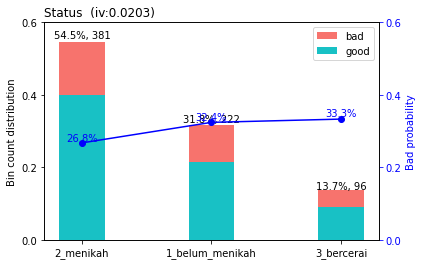

In [51]:
# Melihat plot hasil dari WoE dan IV
scpy.woebin_plot(bins)

In [52]:
# Hasil dari WoE dan IV secara kalkulasi
print(bins)

{'SLIK_Outstanding_CC':               variable                   bin  ...     breaks  is_special_values
0  SLIK_Outstanding_CC       [-inf,100000.0)  ...   100000.0              False
1  SLIK_Outstanding_CC   [100000.0,600000.0)  ...   600000.0              False
2  SLIK_Outstanding_CC  [600000.0,3800000.0)  ...  3800000.0              False
3  SLIK_Outstanding_CC       [3800000.0,inf)  ...        inf              False

[4 rows x 12 columns], 'Mobile_Provider':           variable                bin  ...             breaks  is_special_values
0  Mobile_Provider  Telco_A%,%Telco_B  ...  Telco_A%,%Telco_B              False
1  Mobile_Provider            Telco_C  ...            Telco_C              False
2  Mobile_Provider            Telco_D  ...            Telco_D              False
3  Mobile_Provider            Telco_E  ...            Telco_E              False

[4 rows x 12 columns], 'Pendapatan_perbulan':               variable  ... is_special_values
0  Pendapatan_perbulan  ...        

In [53]:
# Membuat model scorecard

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

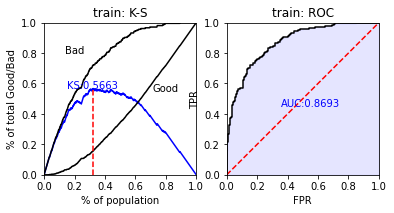

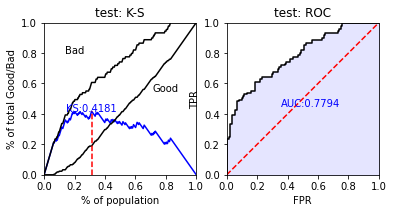

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


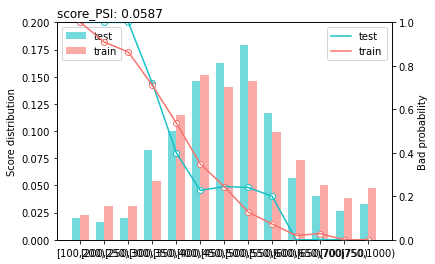

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.058716}

In [55]:
# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [56]:
# Obtain predictions from the test data 
predicted = lr.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = lr.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       212
           1       0.69      0.49      0.58        89

    accuracy                           0.78       301
   macro avg       0.75      0.70      0.72       301
weighted avg       0.77      0.78      0.77       301

Confusion matrix:
 [[192  20]
 [ 45  44]]
ROC Score: 0.7793618825524697
